In [2]:
import pandas as pa
from qutip import *
from matplotlib import pyplot as plt
import numpy as np
from scipy.fft import fft, fftfreq

ModuleNotFoundError: No module named 'qutip'

In [ ]:
!pip install qutip

In [10]:
tpi = 0.075 #us
N = 16
Tpi = N*tpi

def total_tau_from_w(w):
    
    tau = 1/(2*w)
    total_tau = tau*N
    total_tau_mp = total_tau
    
    return total_tau_mp

def plot_lor(w,c,a,o):
    tt = np.linspace(-6,100,1000)
    return tt,o + a*w**2 /((tt-c)**2 + w**2)

def data_raw_to_data(data_raw, data_option):
    plot_option = data_option #1 = Signal1, 2 = Signal2, 3 = delta of signals
    err = None

    #Choose what to plot
    if plot_option == 3:
        data = data_raw[1] - data_raw[2]
        shift = (data_raw.shape[0]-1)//2
        err1 = abs(data_raw[1+shift])
        err2 = abs(data_raw[2+shift])
        err = err1+err2
    else:
        data = data_raw[plot_option]
        shift = (data_raw.shape[0]-1)//2
        err = data_raw[plot_option+shift]
        
    return data, err

def remove_suffix(input_string, suffix):
    if suffix and input_string.endswith(suffix):
        return input_string[:-len(suffix)]
    return input_string

def remove_prefix(input_string, prefix):
    if prefix and input_string.startswith(prefix):
        return input_string[len(prefix):]
    return input_string

In [11]:
directory = 'G:\\Data\\Qudi_Data\\2024\\07\\20240715\\PulsedMeasurement\\'
path = directory + '20240715-1557-51_CPMG(8)-alt-phased_A-H12-13_NbSe2_S4_rot_2K_70mT_Bnv_OOC_DD_test_pulsed_measurement'+'.dat'
filelabel = remove_suffix(path,'_pulsed_measurement.dat')
filelabel = remove_prefix(filelabel,directory)+'_analysis'

directory_1 = 'G:\\Data\\Qudi_Data\\2024\\07\\20240717\\PulsedMeasurement\\'
path_1 = directory_1 + '20240717-0924-18_CPMG(8)-alt-phased_A-H12-13_NbSe2_S4_rot_2K_70mT_Bnv_IC_DD_test_pulsed_measurement'+'.dat'
filelabel_1 = remove_suffix(path_1,'_pulsed_measurement.dat')
filelabel_1 = remove_prefix(filelabel_1,directory_1)+'_analysis'

NameError: name 'jmat' is not defined

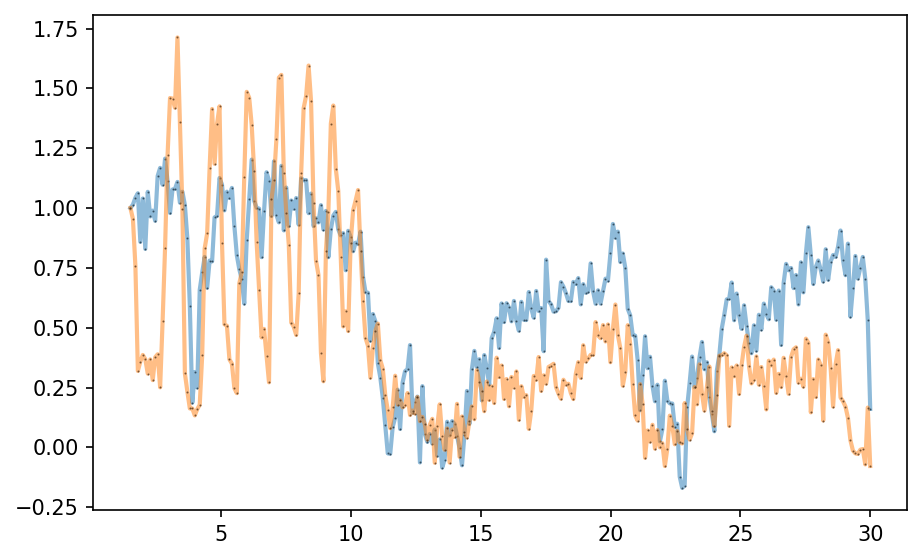

In [19]:
data_raw = np.loadtxt(path).T
data_1, err_1 = data_raw_to_data(data_raw, 1)
data_2, err_2 = data_raw_to_data(data_raw, 2)
data_delta, err_delta = data_raw_to_data(data_raw, 3)

data_raw_1 = np.loadtxt(path_1).T
data_1_1, err_1_1 = data_raw_to_data(data_raw_1, 1)
data_2_1, err_2_1 = data_raw_to_data(data_raw_1, 2)
data_delta_1, err_delta_1 = data_raw_to_data(data_raw_1, 3)

var_list = data_raw_1[0]

plt.figure(dpi=150, figsize = (7,7/1.6))
plt.plot(var_list*1e6,data_delta/data_delta[0],       lw = 2, ls = '-', 
            marker = '.', ms = 1, mew=0.5, mec = 'k', alpha = 0.5)
plt.plot(var_list*1e6,data_delta_1/data_delta_1[0],       lw = 2, ls = '-', 
            marker = '.', ms = 1, mew=0.5, mec = 'k', alpha = 0.5)

#plt.vlines(x = total_tau_from_w(0.192*10.8), ymin =0, ymax= 0.1)
# plt.xlabel('Total_tau (us)')
# plt.title('XY8-1')

#plt.vlines(x = total_tau_from_w(0.192*10.8), ymin =0, ymax= 0.1)

B = 0.06
t2 = 40
Q = 1.3
j = jmat(4.5)
gamma = +24.442/2.3488
gammaSe = 65.27/7.9908
H = Q*j[2]**2 + gamma*B*j[2]
#plt.figure(dpi=150, figsize = (7,7/3))
e = []
for i in np.arange(0,10):
    e.append(expect(fock_dm(10,i),H))
print(np.diff(e))
T2 = 19
for pos in np.diff(e):
    x,y = plot_lor(0.1,np.abs(total_tau_from_w(pos)),0.5,0)
    plt.plot(Tpi+x,1.2*np.exp(-(x/T2)**(3/2))*(1-y), 'k-',)
plt.plot(Tpi+x,1.2*np.exp(-(x/T2)**(3/2))*(1-y), 'k-',label='93Nb')
plt.xlim(6,18)

gammaH = 42.577
gammaSi = 8.465
gammaN15=4.316
gammaC = 10.8
gammaO17 = 5.772
gammaF = 40.069
gammaCu = 11.319
gammaP = 17.235
gammaS = 44
l = ['13C','29Si','17O','19F','31P']
# for i,g in enumerate([gammaN15]):
    
#     Azz = 150
#     Azx = 5.5
#     w2 = 0.5*Azx**2/Azz; w2


#     w2/(gammaN15*B)


#     x,y = plot_lor(0.5,total_tau_from_w(B*g + w2), 1,0, )
#     x2,y2 = plot_lor(0.5,total_tau_from_w((B*g)/3.0), 1,0, )
#     x3,y3 = plot_lor(0.5,total_tau_from_w(B*g/5.0), 1,0, )
#     plt.plot(x,1.2*np.exp(-(x/t2)**(3.0/2))*(1-y-y2-y3),'-', label='P1(N15) Azx=5.5')

# for i,g in enumerate([gammaC]):
    
#     x,y = plot_lor(0.2,total_tau_from_w(B*g), 1.0,0, )
#     x2,y2 = plot_lor(0.1,total_tau_from_w(B*g/3.0), 0.3,0, )
#     x3,y3 = plot_lor(0.1,total_tau_from_w(B*g/5.0), 0.3,0, )
#     plt.plot(x,1.2*np.exp(-((x)/t2)**(3.0/2))*(1-y-y2-y3),'-', label=l[0])
    
# x,y = plot_lor(0.2,total_tau_from_w(1.049*2), 1.0,0, )
# plt.plot(x,1.2*np.exp(-((x)/t2)**(3.0/2))*(1-y-y2-y3),'-', label='test')

# x,y = plot_lor(0.2,total_tau_from_w(0.645*2), 1.0,0, )
# plt.plot(x,1.2*np.exp(-((x)/t2)**(3.0/2))*(1-y-y2-y3),'-', label='13C corr')
    
# for i,g in enumerate([gammaC]):
#     Azz1 = -0.15
#     Azz2 = +0.65
#     Azz3 = +0.95
#     Azz4 = +0.43
#     x,y = plot_lor(0.2,total_tau_from_w(B*g + 0.5*Azz1), 1.0,0, )
#     x,y2 = plot_lor(0.2,total_tau_from_w(B*g + 0.5*Azz2), 1.0,0, )
#     x,y3 = plot_lor(0.2,total_tau_from_w(B*g + 0.5*Azz3), 1.0,0, )
#     x,y4 = plot_lor(0.1,total_tau_from_w(B*g + 0.5*Azz4), 0.8,0, )
#     plt.plot(x,1.2*np.exp(-((x)/t2)**(3.0/2))*(1-y)*(1-y2)*(1-y3)*(1-y4),'-', label=l[0]+'Azz')
#     for azz in [Azz1,Azz2,Azz3,Azz4]:
#         plt.text(64*0.5/(0.2*10+0.5*azz),0.15*azz-0.1,str(azz))
    

    
# for i,g in enumerate([gammaSi,gammaO17,gammaF,gammaP]):
    
#     x,y = plot_lor(0.2,total_tau_from_w(B*g), 0.3,0, )
#     x2,y2 = plot_lor(0.1,total_tau_from_w(B*g/3.0), 0.3,0, )
#     x3,y3 = plot_lor(0.1,total_tau_from_w(B*g/5.0), 0.3,0, )
#     plt.plot(x,1.2*np.exp(-((x)/t2)**(3.0/2))*(1-y-y2-y3),'-', label=l[i+1])

# for i,g in enumerate([gammaH]):
    
#     x,y = plot_lor(0.2,total_tau_from_w(B*g), 0.5,0, )
#     x2,y2 = plot_lor(0.1,total_tau_from_w(B*g/3.0), 0.3,0, )
#     x3,y3 = plot_lor(0.1,total_tau_from_w(B*g/5.0), 0.3,0, )
#     x3,y4 = plot_lor(0.1,total_tau_from_w(B*g/7.0), 0.3,0, )
#     x3,y5 = plot_lor(0.1,total_tau_from_w(B*g/9.0), 0.3,0, )
#     plt.plot(x,1.2*np.exp(-((x)/t2)**(3.0/2))*(1-y-y2-y3-y4-y5),'-', label='1H')




##for i,g in enumerate([gammaN15]):
    
    #x,y = plot_lor(0.5,total_tau_from_w(np.abs(-3.03*0.5 + B*g)), 1,0, )
    #t2 = 19
    #plt.plot(x,1.08*np.exp(-((x)/t2)**(3.0/2))*(1-y),'-.', label='15N+A')

plt.legend(loc='best')
plt.xlabel('Total_tau (us)')
plt.ylabel('Signal (a.u.)')
plt.title('CPMG-8 B=' + str(B) + 'T')
plt.xlim(0,30)
# plt.show()

In [307]:
Azx = 5.5
Azz=150

w2 = 0.5*Azx**2/Azz; w2


w2/(gammaN15*B)


0.11980862305236725

/Users/vvv/opt/miniconda3/envs/qutip-env/lib/python3.7/site-packages/ipykernel_launcher.py:32: RuntimeWarning: invalid value encountered in power
/Users/vvv/opt/miniconda3/envs/qutip-env/lib/python3.7/site-packages/ipykernel_launcher.py:40: RuntimeWarning: invalid value encountered in power
/Users/vvv/opt/miniconda3/envs/qutip-env/lib/python3.7/site-packages/ipykernel_launcher.py:54: RuntimeWarning: invalid value encountered in power
/Users/vvv/opt/miniconda3/envs/qutip-env/lib/python3.7/site-packages/ipykernel_launcher.py:66: RuntimeWarning: invalid value encountered in power
/Users/vvv/opt/miniconda3/envs/qutip-env/lib/python3.7/site-packages/ipykernel_launcher.py:76: RuntimeWarning: invalid value encountered in power


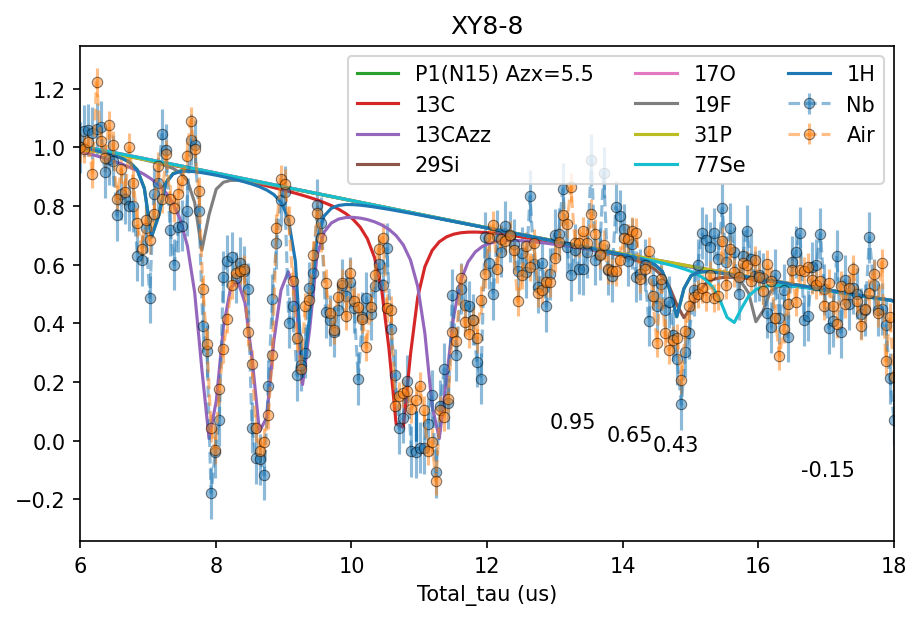

In [374]:
plt.figure(dpi=150, figsize = (7,7/1.6))
plt.errorbar(x=df.t*1e6,y=(df.s0-df.s1)/(df.s0-df.s1)[0], yerr=np.sqrt(df.e0**2 + df.e1**2)/(np.max((df.s0-df.s1)))
                                                                                                  , lw = 1.5, ls = '--', 
             marker = '.', ms = 10, mew=0.5, mec = 'k', alpha = 0.5, label = 'Nb')

plt.vlines(x = total_tau_from_w(0.192*10.8), ymin =0, ymax= 0.1)
plt.xlabel('Total_tau (us)')
plt.title('XY8-8')

#plt.figure(dpi=150, figsize = (7,7/1.6))
plt.errorbar(x=df2.t*1e6,y=(df2.s0-df2.s1)/(df2.s0-df2.s1)[0], yerr=np.sqrt(df2.e0**2 + df2.e1**2)/np.max((df2.s0-df2.s1)), lw = 1.5, ls = '--', 
             marker = '.', ms = 10, mew=0.5, mec = 'k', alpha = 0.5, label ='Air')

plt.vlines(x = total_tau_from_w(0.192*10.8), ymin =0, ymax= 0.1)
plt.xlabel('Total_tau (us)')
plt.title('XY8-8')
l = ['13C','29Si','17O','19F','31P','77Se']
for i,g in enumerate([gammaN15]):
    
    Azz = 150
    Azx = 5.5
    w2 = 0.5*Azx**2/Azz; w2


    w2/(gammaN15*B)


    x,y = plot_lor(0.5,total_tau_from_w(B*g + w2), 1,0, )
    #x2,y2 = plot_lor(0.5,total_tau_from_w((B*g)/3.0), 1,0, )
    #x3,y3 = plot_lor(0.5,total_tau_from_w(B*g/5.0), 1,0, )
    t2 = 19
    plt.plot(x,1.2*np.exp(-(x/t2)**(3.0/2))*(1-y-y2-y3),'-', label='P1(N15) Azx=5.5')

for i,g in enumerate([gammaC]):
    
    x,y = plot_lor(0.2,total_tau_from_w(B*g), 1.0,0, )
    x2,y2 = plot_lor(0.1,total_tau_from_w(B*g/3.0), 0.3,0, )
    x3,y3 = plot_lor(0.1,total_tau_from_w(B*g/5.0), 0.3,0, )
    t2 = 19
    plt.plot(x,1.2*np.exp(-((x)/t2)**(3.0/2))*(1-y-y2-y3),'-', label=l[0])
    
for i,g in enumerate([gammaC]):
    Azz1 = -0.15
    Azz2 = +0.65
    Azz3 = +0.95
    Azz4 = +0.43
    x,y = plot_lor(0.2,total_tau_from_w(B*g + 0.5*Azz1), 1.0,0, )
    x,y2 = plot_lor(0.2,total_tau_from_w(B*g + 0.5*Azz2), 1.0,0, )
    x,y3 = plot_lor(0.2,total_tau_from_w(B*g + 0.5*Azz3), 1.0,0, )
    x,y4 = plot_lor(0.1,total_tau_from_w(B*g + 0.5*Azz4), 0.8,0, )

    
    t2 = 19
    plt.plot(x,1.2*np.exp(-((x)/t2)**(3.0/2))*(1-y)*(1-y2)*(1-y3)*(1-y4),'-', label=l[0]+'Azz')
    for azz in [Azz1,Azz2,Azz3,Azz4]:
        plt.text(64*0.5/(0.2*10+0.5*azz),0.15*azz-0.1,str(azz))
    

    
for i,g in enumerate([gammaSi,gammaO17,gammaF,gammaP, gammaSe]):
    
    x,y = plot_lor(0.2,total_tau_from_w(B*g), 0.3,0, )
    x2,y2 = plot_lor(0.1,total_tau_from_w(B*g/3.0), 0.3,0, )
    x3,y3 = plot_lor(0.1,total_tau_from_w(B*g/5.0), 0.3,0, )
    t2 = 19
    plt.plot(x,1.2*np.exp(-((x)/t2)**(3.0/2))*(1-y-y2-y3),'-', label=l[i+1])

for i,g in enumerate([gammaH]):
    
    x,y = plot_lor(0.2,total_tau_from_w(B*g), 0.5,0, )
    x2,y2 = plot_lor(0.1,total_tau_from_w(B*g/3.0), 0.3,0, )
    x3,y3 = plot_lor(0.1,total_tau_from_w(B*g/5.0), 0.3,0, )
    #x3,y4 = plot_lor(0.1,total_tau_from_w(B*g/7.0), 0.3,0, )
    #x3,y5 = plot_lor(0.1,total_tau_from_w(B*g/9.0), 0.3,0, )
    t2 = 19
    plt.plot(x,1.2*np.exp(-((x)/t2)**(3.0/2))*(1-y-y2-y3-y4-y5),'-', label='1H')



plt.xlim(6,18)
plt.legend(ncol=3)


In [222]:
B = (2.87+2.437)/2.803
B

1.8933285765251517

In [43]:
from qutip import *

In [249]:
def plot_lor(w,c,a,o):
    tt = np.linspace(-6,100,1000)
    return tt,o + a*w**2 /((tt-c)**2 + w**2)
    

Quantum object: dims = [[10], [10]], shape = (10, 10), type = oper, isherm = True
Qobj data =
[[35.325  0.     0.     0.     0.     0.     0.     0.     0.     0.   ]
 [ 0.    22.925  0.     0.     0.     0.     0.     0.     0.     0.   ]
 [ 0.     0.    13.125  0.     0.     0.     0.     0.     0.     0.   ]
 [ 0.     0.     0.     5.925  0.     0.     0.     0.     0.     0.   ]
 [ 0.     0.     0.     0.     1.325  0.     0.     0.     0.     0.   ]
 [ 0.     0.     0.     0.     0.    -0.675  0.     0.     0.     0.   ]
 [ 0.     0.     0.     0.     0.     0.    -0.075  0.     0.     0.   ]
 [ 0.     0.     0.     0.     0.     0.     0.     3.125  0.     0.   ]
 [ 0.     0.     0.     0.     0.     0.     0.     0.     8.925  0.   ]
 [ 0.     0.     0.     0.     0.     0.     0.     0.     0.    17.325]]

[-10.4  -7.8  -5.2  -2.6   0.    2.6   5.2   7.8  10.4]


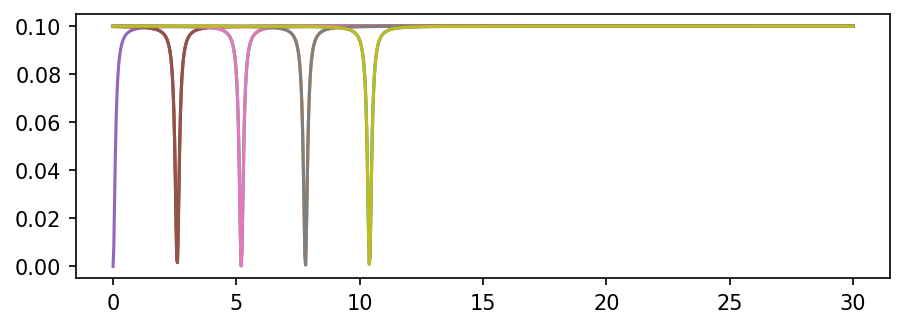

In [152]:
Q = 1.3
j = jmat(4.5)
B = 0.0
gamma = 24.442/2.3488
H = Q*j[2]**2 + gamma*B*j[2]
plt.figure(dpi=150, figsize = (7,7/3))
e = []
for i in np.arange(0,10):
    e.append(expect(fock_dm(10,i),H))
print(np.diff(e))
for pos in np.diff(e):
    x,y = plot_lor(0.1,np.abs(pos),0.1,0)
    plt.plot(x,0.1-y)

[-10.79798365  -8.59798365  -6.39798365  -4.19798365  -1.99798365
   0.20201635   2.40201635   4.60201635   6.80201635]


(6.0, 18.0)

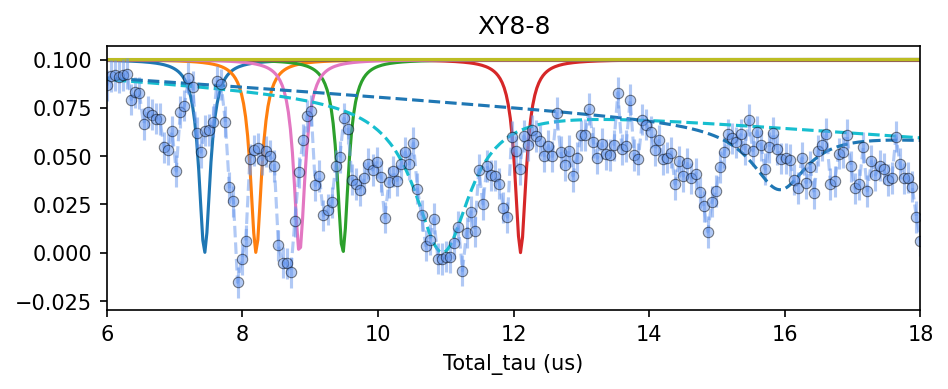

In [179]:
Q = 1.1
j = jmat(4.5)
B = 0.192
gamma = +24.442/2.3488
gammaSe = 65.27/7.9908
H = Q*j[2]**2 + gamma*B*j[2]
plt.figure(dpi=150, figsize = (7,7/3))
e = []
for i in np.arange(0,10):
    e.append(expect(fock_dm(10,i),H))
print(np.diff(e))
for pos in np.diff(e):
    x,y = plot_lor(0.1,np.abs(total_tau_from_w(pos)),0.1,0)
    plt.plot(x,0.1-y)
plt.errorbar(x=df.t*1e6,y=df.s0-df.s1, yerr=np.sqrt(df.e0**2 + df.e1**2), lw = 1.5, ls = '--', 
             marker = '.', ms = 10, mew=0.5,color = 'cornflowerblue', mec = 'k', alpha = 0.5)

x,y = plot_lor(0.5,total_tau_from_w(B*10.8), 0.1,0, )
t2 = 28
plt.plot(x,np.exp(-(x/t2)**(3.0/2))*(0.1-y),'--')
x,y = plot_lor(0.5,total_tau_from_w(B*gammaSe), 0.05,0, )
t2 = 28
plt.plot(x,np.exp(-(x/t2)**(3.0/2))*(0.1-y),'--')
plt.xlabel('Total_tau (us)')
plt.title('XY8-8')
plt.xlim(6,18)

Text(0.5, 1.0, 'XY8-8')

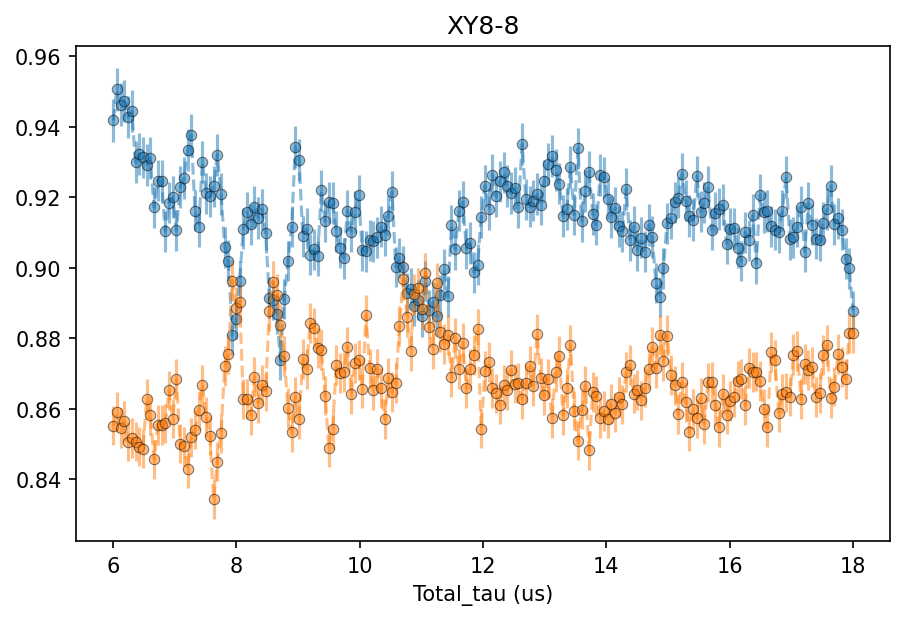

In [50]:
plt.figure(dpi=150, figsize = (7,7/1.6))
plt.errorbar(x=df.t*1e6,y=df.s0, yerr=np.sqrt(df.e0**2), lw = 1.5, ls = '--', 
             marker = '.', ms = 10, mew=0.5, mec = 'k', alpha = 0.5)
plt.errorbar(x=df.t*1e6,y=df.s1, yerr=np.sqrt(df.e1**2), lw = 1.5, ls = '--', 
             marker = '.', ms = 10, mew=0.5, mec = 'k', alpha = 0.5)


plt.xlabel('Total_tau (us)')
plt.title('XY8-8')